<a href="https://colab.research.google.com/github/aishwaryaprabhat/Deep-Learning-with-TF-2.0/blob/main/One_Layer_Neural_Network_applied_to_Breast_Cancer_Classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

print(data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [7]:
import pandas as pd

df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Split into test and training set

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape
print(N, D)

381 30


## Scaling the features

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Architecting and Compiling TF Model

In [22]:
import tensorflow as tf

model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Input(shape=(D,)), #to handle the input 
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Fitting the model on the data (training the model)

In [23]:
trained_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 20ms/step - loss: 1.0483 - accuracy: 0.1376 - val_loss: 0.9804 - val_accuracy: 0.2394
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0047 - accuracy: 0.1712 - val_loss: 0.8846 - val_accuracy: 0.3085
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8803 - accuracy: 0.2916 - val_loss: 0.7996 - val_accuracy: 0.3989
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8031 - accuracy: 0.3936 - val_loss: 0.7266 - val_accuracy: 0.5426
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7267 - accuracy: 0.5329 - val_loss: 0.6605 - val_accuracy: 0.6436
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6686 - accuracy: 0.6132 - val_loss: 0.6065 - val_accuracy: 0.6915
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6147 - accuracy: 0.7088 - val_loss: 0.5614 - val_accuracy: 0.7713
Epoch 8/100


## Evaluating the model

In [24]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.9840


[0.1188168004155159, 0.9840425252914429]

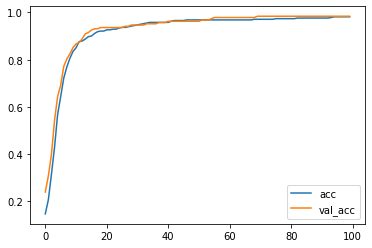

In [25]:
from matplotlib import pyplot as plt

plt.plot(trained_model.history['accuracy'], label='acc')
plt.plot(trained_model.history['val_accuracy'], label='val_acc')
plt.legend()

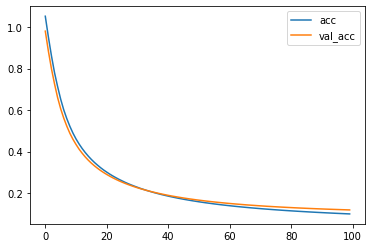

In [26]:
plt.plot(trained_model.history['loss'], label='acc')
plt.plot(trained_model.history['val_loss'], label='val_acc')
plt.legend()